In [165]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model

In [166]:
df = pd.read_csv('Kepler_Regression.csv')
df_corr = df.corr()

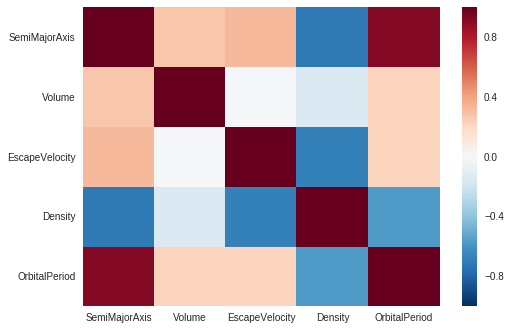

In [167]:
sns.heatmap(df_corr, xticklabels=df_corr.index.values, yticklabels=df_corr.columns.values)
plt.show()

In [143]:
df.head()

,SemiMajorAxis,Volume,EscapeVelocity,Density,planet,OrbitalPeriod
0,0.662104,10.236030,10.892849,6.072644,Venus,0.448359
1,11.721498,8.132345,34.080931,0.758931,Saturn,40.447949
2,4.903094,1.538470,58.493158,1.281688,Jupiter,10.063035
3,0.817968,8.532505,10.034185,6.129132,Venus,0.551544
4,27.016293,7.106079,25.796580,2.108022,Neptune,225.690334


In [168]:
#2 features
X = df.loc[:,['SemiMajorAxis','Density']]
Y = df.loc[:,['OrbitalPeriod']]


X_train = X.iloc[0:-20,:].values.tolist()
Y_train = Y.iloc[0:-20,:].values.tolist()
X_test = X.iloc[-20:,:].values.tolist()
Y_test = Y.iloc[-20:,:].values.tolist()
# all features
X1 = df.iloc[:,:-2]
Y1 = df.loc[:,['OrbitalPeriod']]
X1_train = X1.iloc[0:-20,:].values.tolist()
Y1_train = Y1.iloc[0:-20,:].values.tolist()
X1_test = X1.iloc[-20:,:].values.tolist()
Y1_test = Y1.iloc[-20:,:].values.tolist()

In [169]:
regr = linear_model.LinearRegression()
regr1 = linear_model.LinearRegression()

In [170]:
regr.fit(X_train, Y_train)
regr1.fit(X1_train, Y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [171]:
print('Coefficients: \n', regr.coef_)
print('Coefficients: \n', regr1.coef_)

Coefficients: 
 [[ 6.5742417   5.68985661]]
Coefficients: 
 [[ 6.67058094 -0.62376088  0.06286835  6.23827019]]


In [172]:
# The mean squared error
print("Mean squared error with 2 features: %.2f"
      % (np.mean((regr.predict(X_test) - Y_test) ** 2)))

Mean squared error with 2 features: 687.99


In [173]:
print("Mean squared error with all features: %.2f"
      % (np.mean((regr1.predict(X1_test) - Y1_test) ** 2)))

Mean squared error with all features: 669.03


In [174]:
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_test, Y_test))

Variance score: 0.87


In [175]:
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr1.score(X1_test, Y1_test))


Variance score: 0.87


In [176]:
type(Y1_test)

list

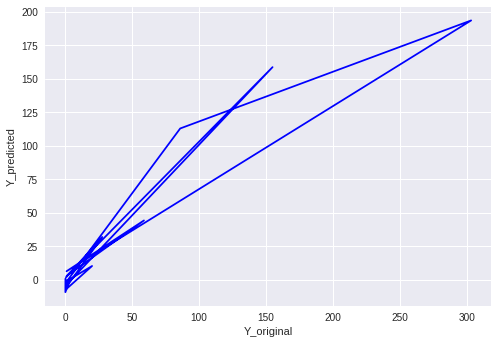

In [177]:
#plt.scatter(Y1_test,regr1.predict(X1_test),color='green')
plt.plot(Y1_test,regr1.predict(X1_test),color='blue')
plt.xlabel('Y_original')
plt.ylabel('Y_predicted')
#plt.xlim(0,200)
plt.show()